# K nearest neighbor classification
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

[2.3430749  1.7        1.5132746  1.86815417 0.94339811 0.53851648
 1.86815417 0.94339811 0.53851648]
1.5132745950421556 [1 3]
[5 8 4 7 2 1 3 6 0]
[0.53851648 0.53851648 0.94339811 0.94339811 1.5132746  1.7
 1.86815417 1.86815417 2.3430749 ]
[[2 3]
 [3 3]
 [2 2]
 [3 2]
 [1 3]
 [1 2]
 [2 1]
 [3 1]
 [1 1]]
[5 8 4]
[0.53851648 0.53851648 0.94339811]
[[2 3]
 [3 3]
 [2 2]]
[[2 3]
 [3 3]
 [2 2]]


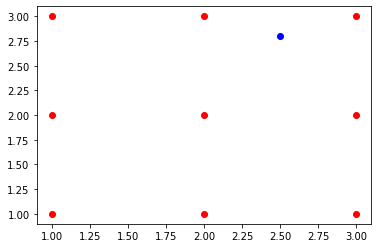

In [3]:
# To find K nearest neighbours
import matplotlib.pyplot as plt
import numpy as np
# find distance between point p and all points present in data


def distance(p1, p2):
    """ Find distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p1-p2, 2)))


points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [
                  2, 2], [2, 3], [3, 1], [3, 2], [3, 3]])
p = np.array([2.5, 2.8])
distances = np.zeros(points.shape[0])

for i in range(len(distances)):
    distances[i] = distance(points[i], p)
print(distances)

plt.plot(points[:, 0], points[:, 1], 'ro')
plt.plot(p[0], p[1], 'bo')
# plt.show()

# we have points and distances corresponding to same place
print(distances[2], points[2])

# We could sort the distances array to give us shorter distances,
# but instead what we really would like to get
# is an index vector that would sort the array.
# If we had that, we could take the first K elements of that array,
# and know that the corresponding points are the K closest
# points to our point of interest p.
# Fortunately, this function exists in NumPy and it's called argsort.
# sort the distance for k pointsthat are nearest

ind = np.argsort(distances)
print(ind)
print(distances[ind])  # distance from point p for each sorted point
print(points[ind])  # we get near points sorted


# if we want tp pick k=3 nearest numbers
k = 3
print(ind[0:k])
print(distances[ind[:k]])
print(points[ind[0:k]])


def find_nearest_points(points, p, k):
    """
    Find k nearest points from point p and return their indices.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(points[i], p)
    ind = np.argsort(distances)
    return (ind[0:k])


test = find_nearest_points(points, p, k);print(points[test])


In [4]:

test_01 = find_nearest_points(points, p, 4);print(points[test_01])

[[2 3]
 [3 3]
 [2 2]
 [3 2]]


In [5]:
import scipy.stats as ss
import random


def majority_votes(votes):
    """returns most common votes"""
    votes_counts = {}
    for vote in votes:
        if vote in votes_counts:
            votes_counts[vote] += 1
        else:
            votes_counts[vote] = 1
# Findout which vote is repeating maximum time
    max_counts = max(votes_counts.values())

    # in order to find which key associated with max value and to findout winner
    winner = []
    for votes, count in votes_counts.items():
        if count == max_counts:
            winner.append(votes)
        #print(votes, count)
    # using random will give us one winner at random if we have more than 1 winner
    return (random.choice(winner))


votes = [1, 2, 1, 3, 2, 1, 7, 8, 8, 8]
winner = majority_votes(votes)
print(winner)


# we can achive all this with help of using mode in numpy but this will not help us when we have more than 1 winner


def majority_votes_short(votes):
    """
    returns most common votes using mode in votes.
    Return an array of the modal (most common) value in the passed array.
    If there is more than one such value, only the smallest is returned. The bin-count for the modal bins is also returned.
    returns,
    mode: ndarray
        Array of modal values.
    count: ndarray

        Array of counts for each mode.
    """
    mode, count = ss.stats.mode(votes)
    return (mode)


votes = [1, 2, 1, 3, 2, 1, 7, 8, 8, 8]
winner2 = majority_votes_short(votes)
print(winner2)


1
[1]


In [6]:



# predict class of function 
outcomes = np.array([0,0,0,0,1,1,1,1,1]) # it shoud be same as size of sample points
def knn_predict(points,p,k,outcomes):

    # to kind k nearest neghbour
    ind =find_nearest_points(points,p,k)
    # predict the class or catagory based on majority votes
    return majority_votes_short(outcomes[ind])

In [7]:
outcomes = np.array([0,0,0,0,1,1,1,1,1]) # it shoud be same as size of sample points
knn_predict(points,[2,1.5],k,outcomes)

array([0])

# Generate synthetic data

#### Lets generate function where first n points belongs to class o and nextn point belongs to class 1. This data is called as synnthetic data s we are generating them with the help of computer. we'll generate predictors from two *bivariate normal distributions*, where the first distribution gives rise to observations belonging to class 0, and the second gives rise to observations belonging to class 1. The word bivariate means two variable like x and y. If it were generating say, just the x variables, then we'd be dealing with univariate data. To generate the synthetic data, we'll be using this *ipstats* module.

In [8]:
#First, we specify the mean and standard deviation
ss.norm(0,1).rvs((5,2)) # use 0 for class 0 value

##We'd like to generate in this example, 5 rows and 2 columns of observations coming from this particular normal distribution.

array([[-1.80772743,  0.13934681],
       [ 0.04320199,  0.5209064 ],
       [-0.45407132,  0.93413919],
       [ 0.1186955 , -1.77958432],
       [-1.72077862,  0.34593941]])

In [9]:
ss.norm(1,1).rvs((5,2)) # use 0 for class 1 value

array([[ 0.37990928,  0.30122589],
       [ 1.60653512,  1.23862753],
       [ 1.4340817 ,  1.68957563],
       [ 0.10383807, -0.15058939],
       [ 1.40959952,  0.73176962]])

In [10]:
# we want to contatinate these so we have 5 points from class 0 and 5 from class 1
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))),axis=0)

array([[ 0.42523375,  2.05896968],
       [ 1.03939172,  1.97507   ],
       [ 0.28263434,  2.06394725],
       [-0.75370763,  0.33311165],
       [ 0.08791034,  1.54827847],
       [ 0.3377936 ,  0.8751894 ],
       [ 1.55845578,  1.49475056],
       [ 1.14856034, -1.18007956],
       [-0.35764903, -0.56163692],
       [ 0.10934438,  1.71523613]])

In [11]:
# for n observation 
n=5
np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)

array([[-0.51562969,  1.26603083],
       [-0.44440705, -1.23342159],
       [-2.04004215,  0.92824978],
       [-0.20270425, -1.25776742],
       [-0.55507948, -1.79778221],
       [ 2.04652739, -0.18890354],
       [ 2.29213922,  0.13040644],
       [-0.77476834,  0.67833472],
       [-0.05609524, -0.41656891],
       [ 1.51184399, -0.3506967 ]])

## Generate outcomes

In [12]:
np.repeat(0,n)

array([0, 0, 0, 0, 0])

In [13]:
np.repeat(1,n)

array([1, 1, 1, 1, 1])

In [14]:
outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))

In [15]:
def generate_syntetic_data(n):
    """
     Create two sets of points from bivariate normal distributions 
     and return set of n poins and n number of outcomes as tuple.
     """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

In [16]:
n=10
points,outcomes= generate_syntetic_data(n)
points

array([[ 0.62043717,  0.55465207],
       [-1.12282666, -4.02327071],
       [ 2.40053888, -1.25825753],
       [ 0.47966306, -0.0346104 ],
       [ 0.08579353, -0.67831458],
       [ 0.38091907,  2.74418654],
       [-1.23465034, -0.81626005],
       [-0.4236435 , -1.44451852],
       [-0.08936338,  0.09091648],
       [ 1.36137121, -1.02530464],
       [ 1.95827851,  0.45161425],
       [-0.70958666,  0.12222682],
       [ 1.73619949,  1.00675668],
       [ 0.85545838, -0.7415401 ],
       [ 0.32657762,  1.88448928],
       [ 2.98734294,  0.9420279 ],
       [ 0.55436332,  0.72353756],
       [ 0.56327893,  0.1334201 ],
       [ 1.43419399,  1.04261408],
       [ 1.34351668,  0.23046979]])

In [17]:
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

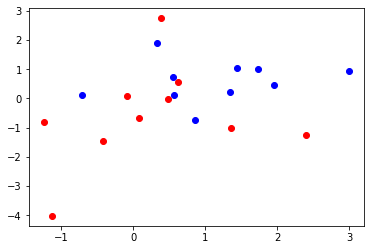

In [18]:
plt.plot(points[0:n,0],points[0:n,1],'ro')
plt.plot(points[n:,0], points[n:,1],'bo')

# Making a Prediction grid
       Learn how to make a prediction grid
       Learn how to use enumerate
       Learn how to use NumPy meshgrid


In [19]:
# use of enumarate
name = ["abc","def","ghi","jkl"]
list(enumerate(name))


[(0, 'abc'), (1, 'def'), (2, 'ghi'), (3, 'jkl')]

In [20]:
for i, value in enumerate(name):
    print (i,value)

0 abc
1 def
2 ghi
3 jkl


In [21]:
# making grid
def make_prediction_grid(limits,h,predictors,k,outcomes):
    (xmin,xmax,ymin,ymax)=limits
    xs = np.arange(xmin,xmax,h)
    ys = np.arange(ymin,ymax,h)
    xx,yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i]=knn_predict(predictors,p,k,outcomes)
    return (xx,yy,prediction_grid)
            

In [22]:
(predictors,outcomes)=generate_syntetic_data(50)
print(predictors,outcomes)

[[-1.23051936 -0.49046448]
 [-0.45697628  1.81672255]
 [ 1.60343354  0.72019102]
 [-0.42739901 -0.32992352]
 [-0.27783359 -1.26280295]
 [ 0.68292091  0.12888991]
 [ 1.28555655 -1.45146139]
 [-0.35353824 -0.09337619]
 [ 0.11348946  0.1177072 ]
 [ 0.67320452  0.80739262]
 [-0.91125903 -2.07262013]
 [-0.04109305  0.51187154]
 [-1.54401125  0.93948254]
 [ 0.8655921   0.04057961]
 [-0.415828   -0.22136804]
 [ 0.07173383  0.08376794]
 [ 1.28011037 -0.11885592]
 [-0.44508447  1.77755316]
 [ 0.62125307  1.25580176]
 [-1.16211976 -1.08579792]
 [ 1.46966267  0.13278126]
 [ 1.20210287 -0.66942249]
 [-0.47478164  2.19157495]
 [-0.48102623  0.6177903 ]
 [ 0.48907042  0.05437672]
 [ 0.81567484 -0.57398949]
 [ 1.24790329 -1.72760965]
 [ 0.3315736   0.507383  ]
 [ 0.56927221  0.29091383]
 [-0.41304076 -1.96160112]
 [ 0.95987331 -0.57716722]
 [ 0.17267657  0.35739332]
 [ 0.24536394  1.13726493]
 [ 0.50512001 -0.60890327]
 [ 1.03969901  0.23690188]
 [-0.62869355  1.07231177]
 [-0.22421485  0.65225537]
 

In [23]:
k=5; file_name = "knn_synth_5.pdf";limits=(-3,4,-3,4);h=0.1


In [24]:
(xx,yy,prediction_grid)=make_prediction_grid(limits,h,predictors,k,outcomes)

In [25]:
print(xx,yy,prediction_grid)

[[-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 ...
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]] [[-3.  -3.  -3.  ... -3.  -3.  -3. ]
 [-2.9 -2.9 -2.9 ... -2.9 -2.9 -2.9]
 [-2.8 -2.8 -2.8 ... -2.8 -2.8 -2.8]
 ...
 [ 3.7  3.7  3.7 ...  3.7  3.7  3.7]
 [ 3.8  3.8  3.8 ...  3.8  3.8  3.8]
 [ 3.9  3.9  3.9 ...  3.9  3.9  3.9]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [32]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

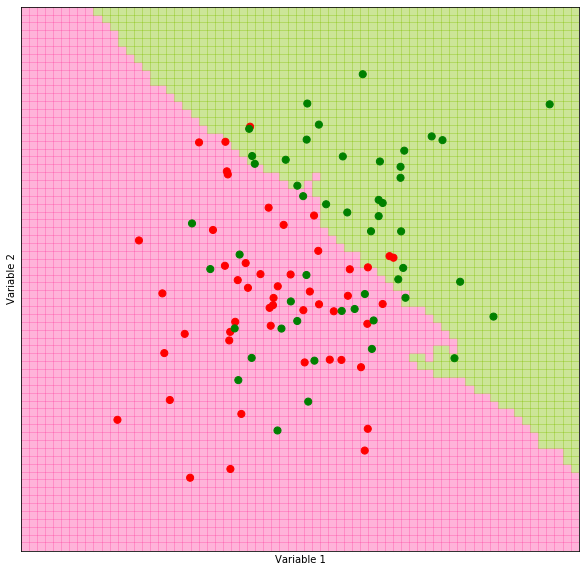

In [33]:
plot_prediction_grid(xx,yy,prediction_grid,file_name)

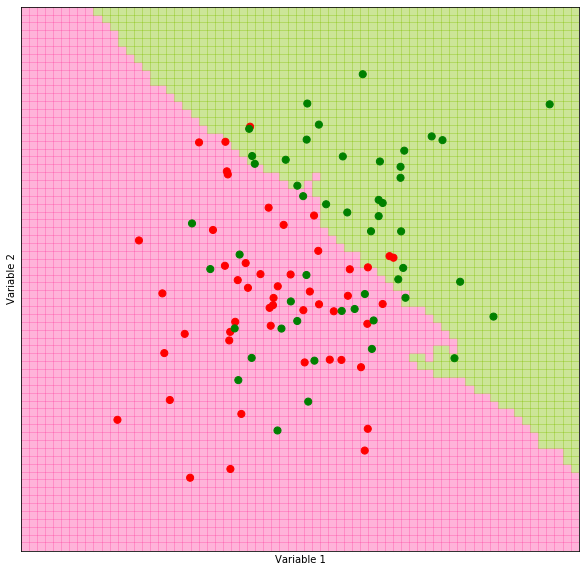

In [34]:
k=50; file_name = "knn_synth_50.pdf";limits=(-3,4,-3,4);h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(limits,h,predictors,k,outcomes)
plot_prediction_grid(xx,yy,prediction_grid,file_name)